# Plateforme d'Acquisition et de Traitement Automatisé des Textes
### Carnet d'expérimentation
---

## Sujet : Prédicteurs pour comité de suivi 

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [56]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [114]:
pd.set_option('display.precision',3)

## Chargement Dataset

In [12]:
df_label = pd.read_pickle('data/prod/230517-OIDS-Label.pickle')

In [13]:
df_label

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,"[Accueil, Actualités, Communauté]",[L’Arabie saoudite a organisé un événement pou...,2022-10-31T00:00:00,,,Par Youcef -,...,0.0,0.0,,FB,Recueil,8,L’Arabie saoudite organise des célébrations d'...,2359,294.88,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
1,https://lesmoutonsrebelles.com/les-reseaux-soc...,lesmoutonsrebelles.com,Les réseaux sociaux coupés volontairement ? Qu...,Il semblerait que la panne mondiale des réseau...,[],[Il semblerait que la panne mondiale des résea...,,,,,...,0.0,NaN,1,FB,Recueil,13,Les réseaux sociaux coupés volontairement ? Qu...,3723,286.38,78521e5bf45d5d672a403958243a58fd95855660
2,https://lesmoutonsrebelles.com/un-rapport-du-p...,lesmoutonsrebelles.com,Un rapport du Pentagone affirme que les extrat...,Selon une énorme base de données de documents ...,[],[Selon une énorme base de données de documents...,,,,,...,0.0,NaN,1,FB,Recueil,17,Un rapport du Pentagone affirme que les extrat...,3545,208.53,db5f4fe97288e2cb2982f2f3f084f299b4bac7a0
3,https://lesmoutonsrebelles.com/un-sondage-defa...,lesmoutonsrebelles.com,Un sondage défavorable pour Emmanuel Macron su...,"Des internautes, dont des politiques, ont affi...",[],"[Des internautes, dont des politiques, ont aff...",,,,,...,0.0,NaN,2,FB,Recueil,14,Un sondage défavorable pour Emmanuel Macron su...,1928,137.71,8189af39fedefc6c901fc8b3a1717fdf5288d7fc
4,https://lemediaen442.fr/le-president-ukrainien...,lemediaen442.fr,Le président ukrainien Zelensky se cache dans ...,Le courage de Zelensky aura été de courte duré...,"[Politique, ukraine, volodymyr zelensky]",[Le courage de Zelensky aura été de courte dur...,2022-03-05T14:55:48+01:00,,,,...,0.0,NaN,3,FB,Recueil,8,Le président ukrainien Zelensky se cache dans ...,2045,255.62,0c2e41f58ac869eb95865751caa3ab29a9f0cd13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,https://lezarceleurs.blogspot.com/2022/04/des-...,lezarceleurs.blogspot.com,Des victimes de test PCR témoignent,De : https://www.naturalnews.com/2022-04-21-vi...,"[accidents, COVID-19, Test PCR, victimes]",[ De : https://www.naturalnews.com/2022-04-21-...,,,NaN,,...,NaN,NaN,NaN,NaN,Verif,29,Des victimes de test PCR témoignent\n De : ht...,6042,208.34,e6cf82ff921171ab67ac2b45ce27dca77a397c1a
902,https://www.francesoir.fr/politique-monde/resu...,www.francesoir.fr,Résultats de l’audit en Arizona : 54 000 bulle...,"CHRONIQUE - Le 24 septembre, le rapport d’audi...","[Accueil, Politique]","[CHRONIQUE - Le 24 septembre, le rapport d’aud...",2021-09-29T13:37:00,,NaN,"Auteur(s)\nElisabeth Dancet, pour FranceSoir",...,NaN,NaN,NaN,NaN,Verif,12,Résultats de l’audit en Arizona : 54 000 bulle...,10542,878.50,c587dbcf33207a0a5c066bcf21cff88cd9fe1c9d
903,https://www.francetvinfo.fr/meteo/orages/tempe...,www.francetvinfo.fr,Tempête Aurore : de puissantes rafales de vent...,Le département du Finistère a été frappé par l...,[],[Le département du Finistère a été frappé par ...,2021-10-21T22:53:00,La moitié nord de la France a été frappée par ...,NaN,"H. Puffeney, A.Lay, J. Jonas, J. Chouquet, Fra...",...,NaN,NaN,NaN,NaN,Verif,2,Tempête Aurore : de puissantes rafales de vent...,1378,689.00,6a77dfe2e50deec474b1373bb7180e39a98bbd0d
904,https://www.francetvinfo.fr/sports/directs/dir...,www.francetvinfo.fr,Euro 2021 : revivez la victoire des Belges sur...,"Pour son quatrième tournoi majeur consécutif, ...",[],"[Pour son quatrième tournoi majeur consécutif,...",2021-06-27T20:14:00,Les tenants du titre portugais abandonnent leu...,NaN,franceinfo: sport,...,NaN,NaN,NaN,NaN,Verif,2,Euro 2021 : revivez la victoire des Belges sur...,828,414.00,ec2b1e32cbac75d21b7ecfa1ea90d82a41300dd1


# Experience
---

## Statistiques sites 

In [14]:
df_label.pivot_table(index='site',columns='infox',values='article',aggfunc='count').fillna(0).astype(int)

infox,0.0,1.0
site,,
actu.fr,17,0
bonsens.info,0,2
elucid.media,1,1
extime.fr,2,0
fr.novopress.info,7,0
fr.sott.net,5,21
francais.rt.com,3,0
infodujour.fr,6,2
lalettrepatriote.com,1,3


## Taille articles

In [16]:
df_labels['c_count']=df_labels['text'].apply(len)

In [26]:
max_c_count = 50_000

In [27]:
df_labels[df_labels['c_count']>=max_c_count]

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
284,https://ripostelaique.com/oui-la-russie-doit-e...,ripostelaique.com,"Oui, la Russie va faire tomber cette Europe po...","Evgeny Fedorov, député de « Russie Unie » (le ...",[GUERRE OTAN CONTRE RUSSIE],"[Evgeny Fedorov, député de « Russie Unie » (le...",2022-07-20T00:00:00,,Evgeny Fedorov,Boris Karpov,...,0.0,0.0,,FB,Recueil,198,"Oui, la Russie va faire tomber cette Europe po...",55267,279.13,55847394681a22c4756caa405aedec8b4db8a2fd
826,https://lezarceleurs.blogspot.com/2022/08/le-g...,lezarceleurs.blogspot.com,Le ginseng du pauvre contre le covid,De : https://doorlesscarp953.substack.com/p/th...,"[flavonoïdes, Gynostemma pentaphyllum, jiaogul...",[ De : https://doorlesscarp953.substack.com/p/...,,,NaN,,...,NaN,NaN,NaN,NaN,Verif,512,Le ginseng du pauvre contre le covid\n De : ht...,355134,693.62,e3fdba06ed5254d84d06b7f8e8955358c27f64c2


In [28]:
df_labels = df_labels[df_labels['c_count']<max_c_count]

In [29]:
df_labels = df_labels.reset_index()

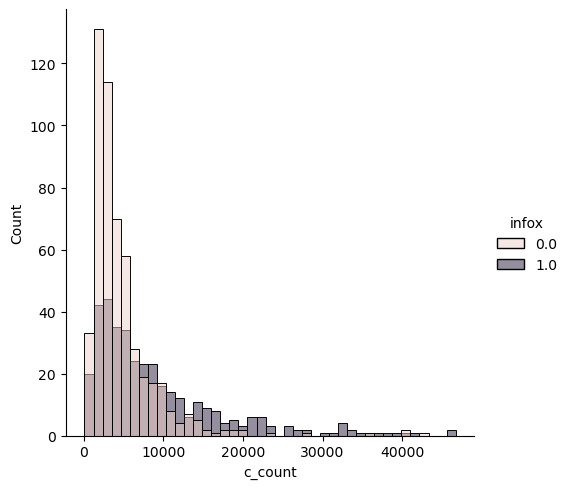

In [31]:
sns.displot(df_labels,x='c_count',hue='infox')

<Axes: xlabel='infox'>

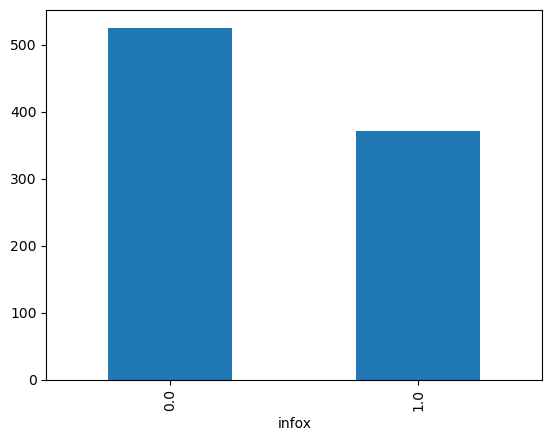

In [45]:
df_labels.value_counts('infox').plot(kind='bar')

## Part of Speech

In [46]:
import spacy
from spacy.language import Language

In [47]:
spacy.info()

{'spacy_version': '3.7.2',
 'location': '/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/spacy',
 'platform': 'macOS-13.6-arm64-arm-64bit',
 'python_version': '3.10.11',
 'pipelines': {'fr_core_news_lg': '3.7.0'}}

In [48]:
nlp = spacy.load("fr_core_news_lg")

In [49]:
def get_spacy_doc(text):
    print(text[:80])
    return nlp(text)

In [51]:
df_spacy = df_label[['infox','text']].copy()

In [52]:
%%time
df_spacy['spacy_doc'] = df_spacy['text'].apply(get_spacy_doc)

L’Arabie saoudite organise des célébrations d' »Halloween » autrefois interdites
Les réseaux sociaux coupés volontairement ? Que s’est-il passé ?
Il semblerait q
Un rapport du Pentagone affirme que les extraterrestres ont donné des « grossess
Un sondage défavorable pour Emmanuel Macron supprimé par RTL ?
Des internautes, 
Le président ukrainien Zelensky se cache dans l’ambassade des États-Unis en Polo
Une étrange structure cubique photographiée sur la face cachée de la Lune
L’agen
Surmortalité post-vaccinale: des scientifiques allemands sondent les statistique
« Emmanuel Macron est un psychopathe amoral », selon le psychiatre italien Adria
Biden utilise cyniquement l’Ukraine pour couvrir le sabotage alimentaire
par F. 
George Soros force les grandes entreprises à boycotter Twitter pour contrer Elon
Igor Kirillov, général russe : « Les États-Unis et l’Otan préparent une attaque 
La fin irrésistible d’un Empire prédateur
Beaucoup d’internautes favorables à la
La variole du singe : « Trom

Pilule Rouge – Les 6 Armes du Contrôle Généralisé
Il existe des maladies qui ne 
Un club de milliardaires pour tenter d’enrayer la surpopulation
Article original
Piratage du système de vote informatisé de l’Amérique
Article original datant du
Quelle est la principale cause de décès en Alberta en 2021 ?
Ce n’est pas la COV
Le chef des forces de défense radiologique russe déclare le COVID 19 comme étant
Qu’est-ce que MongoDB ? Et comment est-il entré en jeu dans la révélation lors d
La Space Force prend en charge toutes les communications militaires par satellit
Le gouvernement français va recruter 3 000 « policiers verts » pour lutter contr
Vous pensez que nous nous sommes trompés ? Voici une liste de contrôle pratique 
Des scientifiques de Harvard et de Johns Hopkins ont découvert que les vaccins c
UE - l'hécatombe post-vaccinale au 23 avril 2022
 De : https://healthimpactnews.
La fraude massive de PFIZER  lors des essais de vaccins COVID-19, démontrée par 
Azovstal : Les otages du bat

Zelensky parti demander à papa Biden une aide pour son pays et son compte en ban
Le chef du renseignement iranien assure que la CIA dicte son carnet de route à E
La cabale mondialiste promeut un régime à base d’insectes — et de cannibalisme
[
Étude: 22 % des moins de 50 ans diagnostiqués avec une nouvelle maladie post-vac
“Jour du dépassement”: à partir de ce jeudi 28 juillet, l’humanité vit à crédit

Un sosie de Poutine a-t-il été envoyé en Iran ?
Un sosie de Biden, on le saurait
La Turquie bloque les pourparlers d’adhésion de la Suède et de la Finlande à l’O
Irak: Découverte d’une cité antique vieille de 3 400 ans
Si les conséquences env
Les 10 plans les plus diaboliques du Forum économique mondial pour l’humanité
Da
Des scientifiques transforment par erreur des hamsters en "monstres" agressifs
D
La surveillance de masse de la NSA pulvérise les records
Selon la firme birmane 
Une mission archéologique égyptienne met au jour le plus grand ensemble de statu
Fake news ? Les deux députés

Le Prince Charles a-t-il ignoré les signaux d’alarme indiquant que son ami Jimmy
Un couple âgé de Shanghai révèle sa méthode pour se protéger du Covid
Au milieu 
Un nouveau livre explore la forte augmentation du nombre de décès chez les jeune
Newsguard : agence de notation des médias et de défense des intérêts américains

Tchao Pantine… dans la choucroute
Bernard Kern est l’ancien assistant parlementa
Paris : laissé libre après avoir tenté d’attaquer des policiers avec un couteau,
Pour réduire le stock de dossiers bloqués dans les commissariats, une dépêche in
L’avortement sans condition jusqu’à neuf mois préconisé par l’OMS
L'Organisation
"Elles n'ont plus de règles" après le vaccin covid: "Où est mon cycle" libère la
Un Doctothon ce 16 avril centré exclusivement sur les effets secondaires du vacc
"RothschildGate" ? "Où est passé le patrimoine de Macron?" Jean-Baptiste Rivoire
Vrais mensonges et fausses vérités: les nouveaux standards de la propagande
EDIT
Les masques pourraient génér

Jusqu’à présent, seuls 9 des 30 États membres de l’OTAN ont exprimé leur soutien
Révélé : des documents montrent comment le DHS complote pour contrôler la « dési
Rumble déclare qu’il ne modifiera pas sa politique pour satisfaire les exigences
Ne vous inquiétez pas, nous ne manquerons jamais de pétrole
Quand serons-nous à 
10 raisons pour lesquelles le multivers pourrait être réel et pourquoi nous pour
Article d’opinion du NY Times : « S’accoupler avec des personnes de petite taill
Pourquoi les trous noirs révèlent la majesté quantique de l’Univers
Ce vide effr
Bill Gates devant le Tribunal judiciaire de Nanterre: a-t-il tenu des propos con
L’affiche de campagne polémique de l’UDMF (« Démocrates Musulmans »)
L’Union des
Législatives en Loire-Atlantique. Qui est Laurent Gaudeau, candidat Reconquête d
Mélenchon à Nantes ce 17 mai : l’eau manque, les socialistes aussi
Jean-Luc Méle
Tyrannie sanitaire. 450 personnes à la conférence donnée par Louis Fouché (Réinf
Sécurité routière : des rada

De l’importance de l’angle
ÉDITO — « Ça dépend de l’angle sous lequel on regarde
Plusieurs Français ont été poignardés sans que cela émeuve beaucoup les médias
L
Italie : aux portes du pouvoir, Meloni ne cède rien sur l’avortement
Contraireme
Chapitre 7 : Nous notons depuis une vingtaine d’année une augmentation des phéno
Combat politique ou combat religieux ?
Article proposé par l’abbé Pagès :
Il s’a
Portugal : La chaîne d’information TVI annonce une inquiétante augmentation de 2
Vladimir Poutine annonce que l’économie de la Russie s’améliore avec un chômage 
Le référendum sur l’adhésion à la Russie a commencé à Donetsk malgré les bombard
ONU – Le Premier ministre de Nouvelle-Zélande demande aux dirigeants du monde d’
Le président ukrainien Zelensky appelle au génocide de la population russe : « V
Le bras droit du président Macron, Alexis Kohler, mis en examen pour « prise ill
Un an de prison avec sursis contre Morandini pour corruption de mineurs : « Il v
Macron recase ses amis : il 

Vaccins et 5G - Tous cobayes
 
https://www.legifrance.gouv.fr/eli/ordonnance/202
Connaissez-vous l'histoire de la Nationale 7, route mythique des vacances ?     
Affaire Omar Raddad : une nouvelle piste va-t-elle relancer l’enquête ?
Condamné
Laïcité, reconnaissance faciale dans les lycées, affaire Polanski... le "8h30 fr
Maryse Wolinski : "Pour Georges, le bonheur c’était un métier"
Tous les jours, u
Drogue. En détention provisoire à Brest pour séquestration et torture
Deux homme
Présidentielle 2022 : des fidèles hésitants après l'absence de consigne de vote 
Incendies en Algérie : la plupart des feux à présent maîtrisés
Ce vendredi, à pe
Italie : face à la concurrence des restaurants locaux, Domino's Pizza quitte le 
Essai auto : MG5, la familiale électrique la moins chère du marché              
La ministre de la Transition écologique a-t-elle raison de dire que "beaucoup de
Soupçons d'emplois fictifs : Michel Mercier, ancien garde des Sceaux, comparaîtr
Les cinq infos insolites de 

La longévité de Jeanne Calment mise en doute par des scientifiques russes
Et si 
Ellie Smart, la championne de plongeon de falaises qui veut sauver les océans de
Le célèbre boxeur des Gilets Jaunes, Christophe Dettinger, ne touchera pas sa ca
Nucléaire : troisième action de militants de Greenpeace contre le siège parisien
Le vaccin, un médicament pas tout à fait comme les autres
Le vaccin contre la gr
7 mensonges à propos de l’Afghanistan
par Thierry Meyssan.
En couvrant la chute 
Intempéries : de gros dégâts matériels à Vichy
Samedi 4 juin, les orages n’ont p
"Je ne demande pas la charité, je demande l'égalité" : Dominique Farrugia dénonc
Ménage : les produits d’entretien sont-ils compatibles avec le bio ?            
Sport : quels événements importants en 2022 ?
Alors que 2021 s’achève, l’année 2
Ivan Rioufol : « Castex nous parlait comme si nous étions des otages ou des pris
Avec la sécheresse, les vendanges 2022 s'annoncent précoces                    

Variole du singe : la vaccin

Des officiers ukrainiens voudraient liquider Zélenski avec l'aide des forces spé
Pfizer dit à un juge fédéral qu'il est propriétaire du gouvernement fédéral et q
Le Scandale du Rivotril
"L'état de crise permanent" que nous vivons depuis 2 ans
La malversation derrière le feu vert de la FDA pour les vaccins destinés aux enf
Les effets  indésirables graves  du vaccin - RAPPEL
De :  https://www.mondialisa
Brigitte Macron n’aurait déposé aucune plainte pour diffamation dans l’affaire J
L'immunité naturelle au coronavirus est complète et DURABLE – étude
 de : https:
Quatre morts dans un accident de la route sur un pont reliant la France et l'All
Consommation : les Français boudent les distributeurs automatiques de billets
Le
Avortement : le choix des Irlandais
En Irlande, lors du référendum, les électeur
Assassin’s Creed : le jeu débarque en réalité augmentée au musée de la Légion Et
Une ex de Cristiano Ronaldo compare porno et téléréalité (vidéo)
Elle avait mis 
Levée du statut de détenu si

In [53]:
df_spacy

,infox,text,spacy_doc
0,0.0,L’Arabie saoudite organise des célébrations d'...,"(L’, Arabie, saoudite, organise, des, célébrat..."
1,1.0,Les réseaux sociaux coupés volontairement ? Qu...,"(Les, réseaux, sociaux, coupés, volontairement..."
2,1.0,Un rapport du Pentagone affirme que les extrat...,"(Un, rapport, du, Pentagone, affirme, que, les..."
3,1.0,Un sondage défavorable pour Emmanuel Macron su...,"(Un, sondage, défavorable, pour, Emmanuel, Mac..."
4,1.0,Le président ukrainien Zelensky se cache dans ...,"(Le, président, ukrainien, Zelensky, se, cache..."
...,...,...,...
901,1.0,Des victimes de test PCR témoignent\n De : ht...,"(Des, victimes, de, test, PCR, , témoignent, ..."
902,1.0,Résultats de l’audit en Arizona : 54 000 bulle...,"(Résultats, de, l’, audit, en, Arizona, :, 54,..."
903,0.0,Tempête Aurore : de puissantes rafales de vent...,"(Tempête, Aurore, :, de, puissantes, rafales, ..."
904,0.0,Euro 2021 : revivez la victoire des Belges sur...,"(Euro, 2021, :, revivez, la, victoire, des, Be..."


In [54]:
from collections import Counter
def get_linguistic_features(row):
    text = row['text']
    doc = row['spacy_doc']
    nb_token = len(doc)
    row['nb_token'] = nb_token
    row['nb_sent'] = len(row['text'].split('.'))
    row['nb_exclam'] = text.count('?')+text.count('!')+text.count('()')+text.count(')')
    token_pos = [token.pos_ for token in doc]
    pos_counter = Counter(token_pos)
    for pos in pos_counter:
        row[pos] = pos_counter[pos]    
    return row

In [57]:
%%time
df_features = df_spacy.progress_apply(get_linguistic_features, axis=1)

  0%|          | 0/904 [00:00<?, ?it/s]

CPU times: user 2.3 s, sys: 60.2 ms, total: 2.36 s
Wall time: 2.38 s


In [58]:
df_features = df_features.fillna(0)

In [59]:
no_scale_columns = ['infox','nb_token', 'spacy_doc', 'text','nb_sent'] 
df_pos = df_features.drop(columns=['infox', 'spacy_doc', 'text']).astype(int)
df_y = df_features[['infox']].astype(int)

In [60]:
df_pos

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token
0,24,63,27,28,9,58,0,77,3,21,29,49,5,23,0,46,2,1,14,464
1,46,114,27,30,15,78,0,144,15,20,36,76,6,26,0,54,8,6,26,695
2,48,101,23,24,15,79,0,131,13,11,30,79,4,44,1,51,29,5,19,683
3,11,40,17,19,2,38,0,62,12,22,40,54,8,18,1,37,1,10,16,382
4,19,57,13,24,6,56,0,68,7,30,39,41,5,13,0,37,0,1,18,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,49,150,47,60,22,137,0,241,22,66,42,122,22,109,0,134,20,8,50,1243
902,125,298,93,104,45,284,0,410,22,80,93,159,32,18,0,204,1,7,62,1968
903,9,45,6,25,0,38,0,67,12,5,12,31,0,5,0,26,0,0,15,281
904,7,25,2,5,2,21,0,40,6,0,14,22,0,4,0,11,0,2,7,159


In [61]:
df_pos['sent_size']=df_pos['nb_token']/df_pos['nb_sent']

In [62]:
df_pos[df_y['infox']==0]['sent_size'].describe()

count    531.00
mean      29.66
std       18.15
min        7.64
25%       24.32
50%       28.44
75%       32.60
max      397.00
Name: sent_size, dtype: float64

In [63]:
df_pos[df_y['infox']==1]['sent_size'].describe()

count    373.00
mean      32.14
std       13.28
min        8.44
25%       25.42
50%       30.64
75%       35.88
max      176.00
Name: sent_size, dtype: float64

In [64]:
def normalize(row):
    nb_token = row['nb_token']
    row = row.apply(lambda x : x/nb_token)
    row['nb_token'] = nb_token
    return row

df_pos_norm = df_pos.apply(normalize,axis=1)

df_pos_norm

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token,sent_size
0,0.05,0.14,0.06,0.06,1.94e-02,0.12,0.0,0.17,6.47e-03,0.05,...,0.11,1.08e-02,4.96e-02,0.00e+00,0.10,4.31e-03,2.16e-03,0.03,464.0,0.07
1,0.07,0.16,0.04,0.04,2.16e-02,0.11,0.0,0.21,2.16e-02,0.03,...,0.11,8.63e-03,3.74e-02,0.00e+00,0.08,1.15e-02,8.63e-03,0.04,695.0,0.04
2,0.07,0.15,0.03,0.04,2.20e-02,0.12,0.0,0.19,1.90e-02,0.02,...,0.12,5.86e-03,6.44e-02,1.46e-03,0.07,4.25e-02,7.32e-03,0.03,683.0,0.05
3,0.03,0.10,0.04,0.05,5.24e-03,0.10,0.0,0.16,3.14e-02,0.06,...,0.14,2.09e-02,4.71e-02,2.62e-03,0.10,2.62e-03,2.62e-02,0.04,382.0,0.06
4,0.05,0.14,0.03,0.06,1.45e-02,0.13,0.0,0.16,1.69e-02,0.07,...,0.10,1.20e-02,3.13e-02,0.00e+00,0.09,0.00e+00,2.41e-03,0.04,415.0,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.04,0.12,0.04,0.05,1.77e-02,0.11,0.0,0.19,1.77e-02,0.05,...,0.10,1.77e-02,8.77e-02,0.00e+00,0.11,1.61e-02,6.44e-03,0.04,1243.0,0.02
902,0.06,0.15,0.05,0.05,2.29e-02,0.14,0.0,0.21,1.12e-02,0.04,...,0.08,1.63e-02,9.15e-03,0.00e+00,0.10,5.08e-04,3.56e-03,0.03,1968.0,0.02
903,0.03,0.16,0.02,0.09,0.00e+00,0.14,0.0,0.24,4.27e-02,0.02,...,0.11,0.00e+00,1.78e-02,0.00e+00,0.09,0.00e+00,0.00e+00,0.05,281.0,0.07
904,0.04,0.16,0.01,0.03,1.26e-02,0.13,0.0,0.25,3.77e-02,0.00,...,0.14,0.00e+00,2.52e-02,0.00e+00,0.07,0.00e+00,1.26e-02,0.04,159.0,0.14


### Comparaison moyenne autres features

In [65]:
desc_1 = df_pos_norm[df_y['infox']==1].describe()
desc_0 = df_pos_norm[df_y['infox']==0].describe()

df_desc_ratio =(desc_1/desc_0).loc[['mean']].T.sort_values('mean')

pos_names = {
    'ADJ': 'adjective',
    'ADP': 'adposition',
    'ADV': 'adverb',
    'AUX': 'auxiliary',
    'CCONJ': 'coordinating conjunction',
    'DET': 'determiner',
    'INTJ': 'interjection',
    'NOUN': 'noun',
    'NUM': 'numeral',
    'PART': 'particle',
    'PRON': 'pronoun',
    'PROPN': 'proper noun',
    'PUNCT': 'punctuation',
    'SCONJ': 'subordinating conjunction',
    'SYM': 'symbol',
    'VERB': 'verb',
    'X': 'other',
}

df_desc_ratio['comment'] = df_desc_ratio.index.map(lambda pos : pos_names.get(pos,''))
df_desc_ratio

,mean,comment
sent_size,0.76,
PROPN,0.90,proper noun
PUNCT,0.91,punctuation
nb_sent,0.93,
SYM,0.95,symbol
ADP,0.95,adposition
NOUN,0.96,noun
NUM,0.97,numeral
DET,1.01,determiner
VERB,1.02,verb


### Benchmark Machine Learning

In [66]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              HistGradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [67]:
predictors = {
    "Logistic Regression" : LogisticRegression(C=1000, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000),
    "Neural Network" : MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state),
#    "RBF SVM" : SVC(gamma=2, C=1, probability=True, random_state=random_state),
#    "Gaussian Naive Bayes" : GaussianNB(),
#    "Multinomial Naive Bayes" : MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None),
#    "Nearest Neighbors" : KNeighborsClassifier(3),
#    "Linear SVM" : SVC(kernel="linear", C=0.025, probability=True, random_state=random_state),
#    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0), random_state=random_state),
#    "Decision Tree" : DecisionTreeClassifier(max_depth=5, random_state=random_state),
#    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=random_state),
#    "AdaBoost" : AdaBoostClassifier(random_state=random_state),
#    "QDA" : QuadraticDiscriminantAnalysis(),
#    'Gradient Boosting': HistGradientBoostingClassifier(random_state=random_state),
#    'Dummy' : DummyClassifier(strategy='uniform', random_state=random_state),
}

In [80]:
train_size = 0.80

In [81]:
import patat.ml.benchmark

In [102]:
importlib.reload(patat.ml.benchmark)

<module 'patat.ml.benchmark' from '/Volumes/Geek/Work/Patat/patat/ml/benchmark.py'>

In [103]:
bench = patat.ml.benchmark.Benchmark()

In [106]:
predictors = {
            "Logistic Regression" : LogisticRegression(C=1, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000),
        }

In [107]:
df_bench_cv = bench.cv_benchmark(df_X,df_y['infox'],cv=5,random_state=random_state, predictors=predictors)
df_bench_cv

{'Logistic Regression': {'fit_time': array([0.00757098, 0.00321984, 0.00296903, 0.00288486, 0.00345802]),
  'score_time': array([0.00482297, 0.0038321 , 0.00362301, 0.00330806, 0.00439811]),
  'test_accuracy': array([0.59668508, 0.68508287, 0.60773481, 0.66298343, 0.71111111]),
  'test_f1': array([0.43410853, 0.48648649, 0.34862385, 0.35789474, 0.5       ]),
  'test_recall': array([0.37837838, 0.36      , 0.25333333, 0.22666667, 0.35135135]),
  'test_precision': array([0.50909091, 0.75      , 0.55882353, 0.85      , 0.86666667]),
  'test_roc_auc': array([0.56769386, 0.65798742, 0.64716981, 0.7472956 , 0.7700153 ])}}

In [116]:
scores = []
for pred in df_bench_cv:
    for score in df_bench_cv[pred]:
        scores.append({
            'classifier':pred,
            'score':score,
            'mean':df_bench_cv[pred][score].mean(),
#            'std':df_bench_cv[pred][score].std(),
        })
pd.DataFrame(scores)

,classifier,score,mean
0,Logistic Regression,fit_time,0.004
1,Logistic Regression,score_time,0.004
2,Logistic Regression,test_accuracy,0.653
3,Logistic Regression,test_f1,0.425
4,Logistic Regression,test_recall,0.314
5,Logistic Regression,test_precision,0.707
6,Logistic Regression,test_roc_auc,0.678


In [117]:
pd.DataFrame(scores).pivot_table(index='classifier',columns='score',values='mean')

score,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall,test_roc_auc
classifier,,,,,,,
Logistic Regression,0.004,0.004,0.653,0.425,0.707,0.314,0.678


In [94]:
df_X=df_pos_norm[['nb_token','SPACE','SCONJ','nb_exclam','INTJ']]
df_bench = bench.benchmark(df_X,df_y['infox'],train_size=train_size,random_state=random_state)


In [85]:
df_bench = df_bench.sort_values(by='f1',ascending=False)

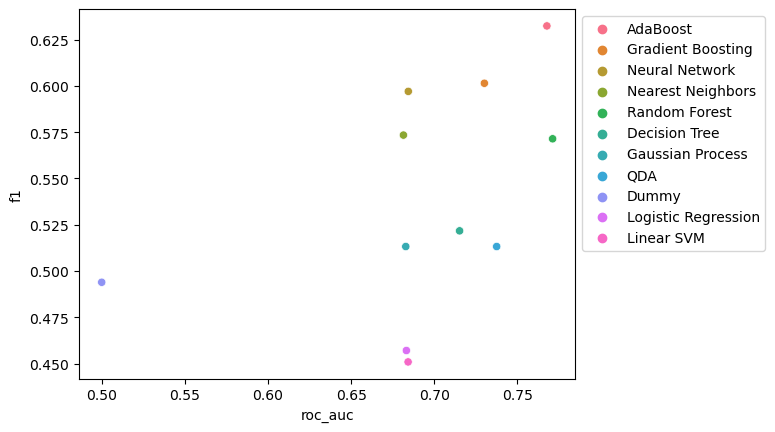

In [86]:
ax = sns.scatterplot(df_bench,y='f1',x='roc_auc',hue=df_bench.index)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [79]:
df_bench

,roc_auc,f1,accuracy,recall,precision,false_positive,false_negative,fit_time,proba_time
AdaBoost,0.77,0.63,0.72,0.60,0.67,0.12,0.16,3.42e-02,2.55e-03
Gradient Boosting,0.73,0.60,0.69,0.60,0.61,0.15,0.16,9.66e-01,8.06e-03
Neural Network,0.68,0.60,0.70,0.56,0.65,0.12,0.18,4.65e-02,4.52e-04
Nearest Neighbors,0.68,0.57,0.66,0.57,0.58,0.17,0.17,8.39e-04,7.43e-04
Random Forest,0.77,0.57,0.70,0.50,0.67,0.10,0.20,6.80e-03,7.26e-04
Decision Tree,0.72,0.52,0.70,0.42,0.70,0.07,0.23,1.62e-03,3.07e-04
Gaussian Process,0.68,0.51,0.70,0.40,0.71,0.07,0.24,1.49e+00,9.75e-03
QDA,0.74,0.51,0.70,0.40,0.71,0.07,0.24,5.75e-04,3.30e-04
Dummy,0.50,0.49,0.54,0.57,0.44,0.29,0.17,1.51e-04,9.30e-05
Logistic Regression,0.68,0.46,0.69,0.33,0.73,0.05,0.27,1.01e-02,1.01e-03


## Ignore Words / Lemmas

In [56]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Lemmas

In [57]:
preprocessor = patat.util.text.preprocess
tokenizer = lex.get_lemmas_from_text

In [58]:
df_words = lex.get_df_words(texts= df_infox['text'],values = df_infox['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_lemmas={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [59]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,13792,20809,34601,False,False,False,False,False,False,False,True,True,True,True,True
la,7998,11129,19127,False,False,False,False,False,False,False,True,True,True,True,True
le,5902,8951,14853,False,False,False,False,False,False,False,True,True,True,True,True
et,5274,8782,14056,False,False,False,False,False,False,False,True,True,True,True,True
les,5179,9243,14422,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
irréprochabilité,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irréprochable,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irrésistiblement,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irs,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False


### Words

In [60]:
tokenizer = lex.get_words

In [61]:
df_words = lex.get_df_words(texts= df_infox['text'],values = df_infox['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_words={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [62]:
for key in ['small','medium','large','xlarge']:
    print(key,len(ignore_words[key]))

small 18928
medium 24908
large 31115
xlarge 33001


In [63]:
ignore_words

{'None': None,
 'small': ['de',
  'la',
  'le',
  'et',
  'les',
  'des',
  'en',
  'un',
  'est',
  'du',
  'une',
  'que',
  'pour',
  'qui',
  'dans',
  'il',
  'par',
  'sur',
  'pas',
  'au',
  'plus',
  'ce',
  'qu',
  'ne',
  'ont',
  'se',
  'avec',
  'sont',
  'été',
  'ou',
  'son',
  'nous',
  'aux',
  'mais',
  'cette',
  'comme',
  'elle',
  'on',
  'fait',
  'être',
  'tout',
  'ces',
  'même',
  'pays',
  'si',
  'sa',
  'leur',
  'aussi',
  'ses',
  'ils',
  'vous',
  'je',
  'bien',
  'sans',
  'contre',
  'faire',
  'après',
  'avait',
  'entre',
  'deux',
  'monde',
  'russie',
  'depuis',
  'était',
  'peut',
  'autres',
  'covid',
  'tous',
  'cela',
  'ukraine',
  'leurs',
  'très',
  'retoqué',
  'raidir',
  'saturne',
  'saubot',
  'militari',
  'pudeur',
  'inflationary',
  'perpétuer',
  'satisfaite',
  'infiltre',
  'savane',
  'saisissant',
  'passifs',
  'saletés',
  'indéfiniment',
  'poète',
  'perdure',
  'politologues',
  'perpétuellement',
  'passeront

In [64]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,13792,20809,34601,False,False,False,False,False,False,False,True,True,True,True,True
la,7998,11129,19127,False,False,False,False,False,False,False,True,True,True,True,True
le,5902,8951,14853,False,False,False,False,False,False,False,True,True,True,True,True
et,5274,8782,14056,False,False,False,False,False,False,False,True,True,True,True,True
les,5179,9243,14422,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intempérie,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
intello,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
intelligenceiii,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
intellectuels,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False


## CountVectorizer

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
df_texts = df_infox

In [66]:
tokenizer = lex.get_words

In [67]:
benches = {}
for key in ignore_words.keys():
    vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words[key])
    count_matrix = vectorizer.fit_transform(df_infox['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 2.217872142791748 s
INFO:root:Training Neural Network
INFO:root:Training time : 5.882966041564941 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.825717492384159
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.3311941623687744 s
INFO:root:Training Neural Network
INFO:root:Training time : 3.023588180541992 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.828443161776495
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/s

In [76]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.8694885361552027
small : 0.8802308802308803
medium : 0.8781465448132115
large : 0.880391213724547
xlarge : 0.8621131954465288


In [77]:
df_bench=benches['None']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.869489,0.765957,0.791139,0.701299,7.528105,0.063291,0.145570,0.412436,0.136459
Neural Network,0.867885,0.780142,0.803797,0.714286,7.071856,0.056962,0.139241,25.730993,0.137170


In [78]:
df_bench=benches['xlarge']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Neural Network,0.862113,0.763889,0.78481,0.714286,7.756229,0.075949,0.139241,3.522386,0.019396
Logistic Regression,0.859548,0.760563,0.78481,0.701299,7.756229,0.069620,0.145570,0.114746,0.019221


## TF/IDF Words

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_texts = df_infox

In [80]:
tokenizer = lex.get_words

In [81]:
benches = {}
for key in ignore_words.keys():
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words[key])
    count_matrix = vectorizer.fit_transform(df_infox['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.4090602397918701 s
INFO:root:Training Neural Network
INFO:root:Training time : 25.931516885757446 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.8694885361552027
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.3343772888183594 s
INFO:root:Training Neural Network
INFO:root:Training time : 9.074546813964844 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.8802308802308803
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packag

In [82]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.8694885361552027
small : 0.8802308802308803
medium : 0.8781465448132115
large : 0.880391213724547
xlarge : 0.8621131954465288


In [83]:
df_bench=benches['small']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Neural Network,0.880231,0.814286,0.835443,0.740260,5.931234,0.037975,0.126582,9.074547,0.069381
Logistic Regression,0.879590,0.794326,0.816456,0.727273,6.615607,0.050633,0.132911,0.334377,0.068248


## TF/IDF Lemmas

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_texts = df_infox

In [85]:
tokenizer = lex.get_lemmas_from_text

In [86]:
benches = {}
for key in ignore_lemmas.keys():
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas[key])
    count_matrix = vectorizer.fit_transform(df_infox['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.6177098751068115 s
INFO:root:Training Neural Network
INFO:root:Training time : 13.723562002182007 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.8762225428892096
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'bouil

In [87]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.8762225428892096
small : 0.8863235529902196
medium : 0.8877665544332211
large : 0.8722142055475388
xlarge : 0.8651595318261985


In [88]:
df_bench=benches['small']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.886324,0.849315,0.860759,0.805195,5.018737,0.044304,0.094937,0.296303,0.048659
Neural Network,0.885522,0.763359,0.803797,0.649351,7.071856,0.025316,0.170886,13.703679,0.048517


## Augmentation données entrainement avec AFP

In [89]:
df_texts_afp =  pd.read_csv('data/demo/221221-TextAfp.csv')

In [90]:
afp_size = 20
df_texts = pd.concat([df_infox,df_texts_afp.sample(afp_size,random_state=random_state)])

In [91]:
tokenizer = lex.get_lemmas_from_text
#tokenizer = lex.get_words

In [92]:
benches = {}
for key in ['None','small','large']:
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas[key])
    count_matrix = vectorizer.fit_transform(df_texts['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.5948071479797363 s
INFO:root:Training Neural Network
INFO:root:Training time : 14.852005243301392 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.864090909090909
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'bouill

In [93]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.864090909090909
small : 0.8931818181818182
large : 0.8974242424242423


In [94]:
df_bench=benches['large']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.897424,0.797546,0.797546,0.738636,7.297181,0.06135,0.141104,0.070304,0.021708
Neural Network,0.895303,0.790123,0.791411,0.727273,7.518308,0.06135,0.147239,3.080253,0.022256


## Utilisation Features linguistiques

In [95]:
df_pos_norm

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token,sent_size
0,0.053215,0.139690,0.059867,0.062084,0.019956,0.128603,0.0,0.170732,0.006652,0.046563,...,0.108647,0.011086,0.022173,0.0,0.101996,0.004435,0.002217,0.031042,451.0,0.071429
1,0.024862,0.151934,0.038674,0.060773,0.013812,0.154696,0.0,0.201657,0.002762,0.052486,...,0.102210,0.013812,0.027624,0.0,0.124309,0.000000,0.005525,0.033149,362.0,0.083333
2,0.082515,0.139489,0.027505,0.045187,0.017682,0.151277,0.0,0.186640,0.005894,0.021611,...,0.108055,0.011788,0.029470,0.0,0.082515,0.000000,0.000000,0.033399,509.0,0.058824
3,0.054404,0.150259,0.025907,0.062176,0.010363,0.137306,0.0,0.217617,0.010363,0.041451,...,0.147668,0.007772,0.015544,0.0,0.095855,0.000000,0.002591,0.046632,386.0,0.055556
4,0.090909,0.164983,0.043771,0.060606,0.026936,0.151515,0.0,0.208754,0.020202,0.013468,...,0.067340,0.020202,0.016835,0.0,0.097643,0.000000,0.006734,0.026936,297.0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0.057082,0.149049,0.059197,0.032770,0.023256,0.117336,0.0,0.184989,0.019027,0.048626,...,0.103594,0.021142,0.014799,0.0,0.075053,0.005285,0.010571,0.030655,946.0,0.034483
627,0.061966,0.162393,0.070513,0.032051,0.017094,0.130342,0.0,0.207265,0.000000,0.059829,...,0.102564,0.010684,0.014957,0.0,0.083333,0.000000,0.012821,0.040598,468.0,0.052632
628,0.033149,0.113260,0.085635,0.016575,0.024862,0.124309,0.0,0.223757,0.002762,0.099448,...,0.121547,0.019337,0.013812,0.0,0.099448,0.002762,0.008287,0.044199,362.0,0.062500
629,0.077364,0.154728,0.074499,0.037249,0.025788,0.108883,0.0,0.200573,0.028653,0.045845,...,0.117479,0.005731,0.011461,0.0,0.085960,0.002865,0.022923,0.031519,349.0,0.090909


In [96]:
tokenizer = lex.get_lemmas_from_text
#tokenizer = lex.get_words

In [97]:
df_texts=df_infox
pos_cols = ['nb_token','nb_exclam','SPACE','SCONJ','INTJ','ADJ']
benches = {}
#for key in ['None','small','medium','large','xlarge']:
for key in ['medium']:
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas[key])
    count_matrix = vectorizer.fit_transform(df_texts['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = pd.concat([df_tf,df_pos_norm[pos_cols]],axis=1)
#    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = bench.benchmark(df_X,df_texts['infox'],train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'bouillir', 'bruire', 'climatiser', 'coordonner', 'décombrer', 'déplaire', 'joindre', 'matcher', 'menacer', 'mol', 'obéir', 'oxygéner', 'pil', 'presser', 'rouvrir', 'saisir', 'satisfaire', 'subventionner', 'suivre', 'teindre', 'tracter', 'vieillir', 'vrombir', 'émerger', 'équivaloir'] not in stop_words.
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.15610074996948242 s
INFO:root:Training Neural Network
INFO:root:Training time : 

In [98]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

medium : 0.8815135481802148


In [99]:
df_bench=benches['medium']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.881514,0.764706,0.797468,0.675325,7.299980,0.044304,0.158228,0.156101,0.036902
Gradient Boosting,0.815777,0.720000,0.734177,0.701299,9.581224,0.120253,0.145570,11.503403,0.050178
Neural Network,0.778098,0.712329,0.734177,0.675325,9.581224,0.107595,0.158228,1.613397,0.037387
AdaBoost,0.770002,0.662338,0.670886,0.662338,11.862468,0.164557,0.164557,1.246880,0.086930
Linear SVM,0.768318,0.376238,0.601266,0.246753,14.371836,0.031646,0.367089,8.091114,0.201875
Decision Tree,0.635161,0.560000,0.651899,0.454545,12.546841,0.082278,0.265823,0.124146,0.035961
Random Forest,0.601892,0.400000,0.601266,0.272727,14.371836,0.044304,0.354430,0.048041,0.036936
Nearest Neighbors,0.567901,0.583851,0.575949,0.610390,15.284334,0.234177,0.189873,0.048781,0.061173
Dummy,0.500000,0.534161,0.525316,0.558442,17.109329,0.259494,0.215190,0.000306,0.000129
Gaussian Process,0.488616,0.447368,0.468354,0.441558,19.162449,0.259494,0.272152,13.864408,0.685647


# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words['xlarge'])
count_matrix = vectorizer.fit_transform(df_infox['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_X = pd.concat([df_tf,df_pos_norm],axis=1)


In [ ]:
df_X

In [ ]:
df_pos_norm